<a href="https://colab.research.google.com/github/Candida18/ADS_SMA/blob/main/ADS/8960_Candida_Noronha_ADS_Practical_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### <b>Name: Candida Noronha<br/>
### <b>Class: BE COMPS B<br/>
### <b>Roll No.: 8960
### <b>Practical 3

In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/SEM 8/Applied Data Science/Experiment3/train.csv') 

df.info(verbose=True)

df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30471 entries, 0 to 30470
Data columns (total 292 columns):
 #    Column                                 Dtype  
---   ------                                 -----  
 0    id                                     int64  
 1    timestamp                              object 
 2    full_sq                                int64  
 3    life_sq                                float64
 4    floor                                  float64
 5    max_floor                              float64
 6    material                               float64
 7    build_year                             float64
 8    num_room                               float64
 9    kitch_sq                               float64
 10   state                                  float64
 11   product_type                           object 
 12   sub_area                               object 
 13   area_m                                 float64
 14   raion_popul                         

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,...,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc
0,1,2011-08-20,43,27.0,4.0,NaN,NaN,NaN,NaN,NaN,...,9,4,0,13,22,1,0,52,4,5850000
1,2,2011-08-23,34,19.0,3.0,NaN,NaN,NaN,NaN,NaN,...,15,3,0,15,29,1,10,66,14,6000000
2,3,2011-08-27,43,29.0,2.0,NaN,NaN,NaN,NaN,NaN,...,10,3,0,11,27,0,4,67,10,5700000
3,4,2011-09-01,89,50.0,9.0,NaN,NaN,NaN,NaN,NaN,...,11,2,1,4,4,0,0,26,3,13100000
4,5,2011-09-05,77,77.0,4.0,NaN,NaN,NaN,NaN,NaN,...,319,108,17,135,236,2,91,195,14,16331452


In [ ]:
numeric_cols = df.select_dtypes(include=['number']).columns
print(numeric_cols)

non_numeric_cols = df.select_dtypes(exclude=['number']).columns
print(non_numeric_cols)

Index(['id', 'full_sq', 'life_sq', 'floor', 'max_floor', 'material',
       'build_year', 'num_room', 'kitch_sq', 'state',
       ...
       'cafe_count_5000_price_2500', 'cafe_count_5000_price_4000',
       'cafe_count_5000_price_high', 'big_church_count_5000',
       'church_count_5000', 'mosque_count_5000', 'leisure_count_5000',
       'sport_count_5000', 'market_count_5000', 'price_doc'],
      dtype='object', length=276)
Index(['timestamp', 'product_type', 'sub_area', 'culture_objects_top_25',
       'thermal_power_plant_raion', 'incineration_raion',
       'oil_chemistry_raion', 'radiation_raion', 'railroad_terminal_raion',
       'big_market_raion', 'nuclear_reactor_raion', 'detention_facility_raion',
       'water_1line', 'big_road1_1line', 'railroad_1line', 'ecology'],
      dtype='object')


Missing data

In [ ]:
df[non_numeric_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30471 entries, 0 to 30470
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   timestamp                  30471 non-null  object
 1   product_type               30471 non-null  object
 2   sub_area                   30471 non-null  object
 3   culture_objects_top_25     30471 non-null  object
 4   thermal_power_plant_raion  30471 non-null  object
 5   incineration_raion         30471 non-null  object
 6   oil_chemistry_raion        30471 non-null  object
 7   radiation_raion            30471 non-null  object
 8   railroad_terminal_raion    30471 non-null  object
 9   big_market_raion           30471 non-null  object
 10  nuclear_reactor_raion      30471 non-null  object
 11  detention_facility_raion   30471 non-null  object
 12  water_1line                30471 non-null  object
 13  big_road1_1line            30471 non-null  object
 14  railro

In [ ]:
num_missing = df.isna().sum()
num_missing[:10]

id                0
timestamp         0
full_sq           0
life_sq        6383
floor           167
max_floor      9572
material       9572
build_year    13605
num_room       9572
kitch_sq       9572
dtype: int64

In [ ]:
pct_missing = df.isna().mean()
pct_missing[:10]

id            0.000000
timestamp     0.000000
full_sq       0.000000
life_sq       0.209478
floor         0.005481
max_floor     0.314135
material      0.314135
build_year    0.446490
num_room      0.314135
kitch_sq      0.314135
dtype: float64

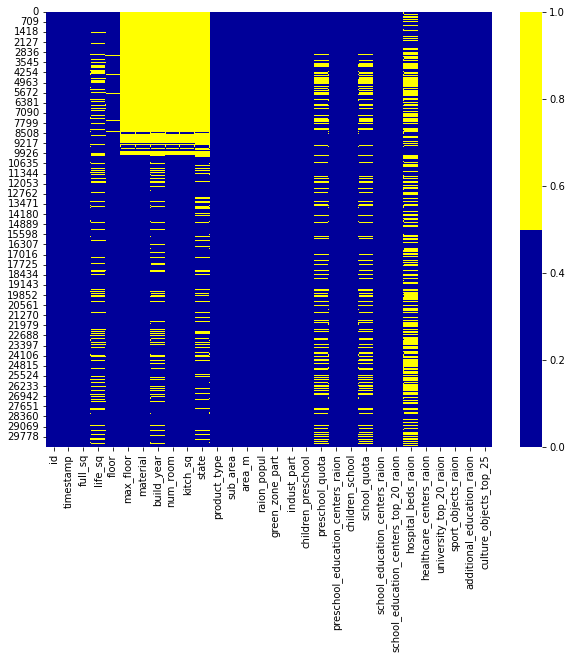

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))

cols = df.columns[:30]
colours = ['#000099', '#ffff00'] # specify colours: yellow - missing. blue - not missing
sns.heatmap(df[cols].isna(), cmap=sns.color_palette(colours))

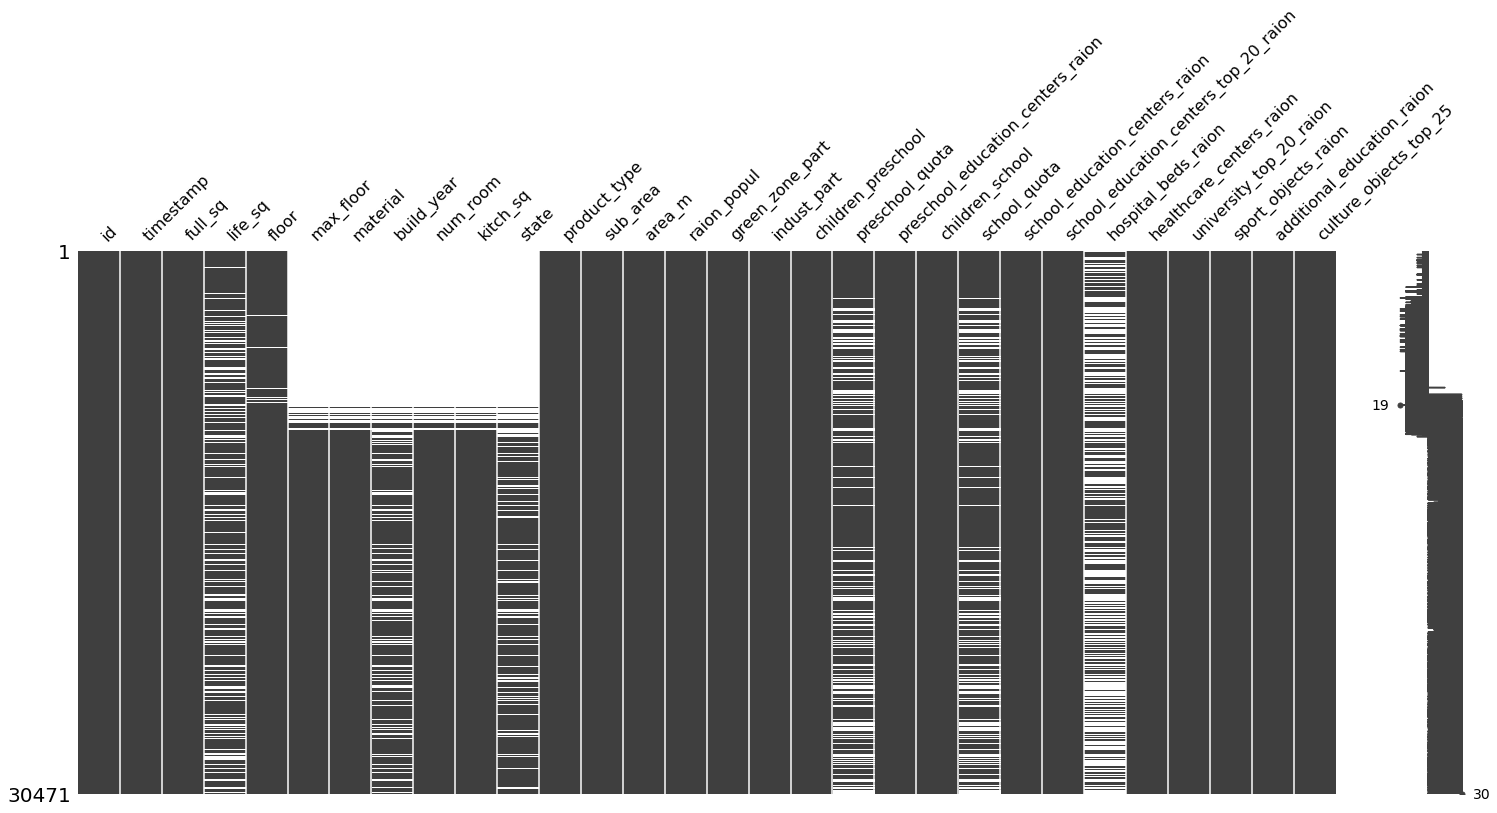

In [ ]:
import missingno as msno
msno.matrix(df.iloc[:, :30])

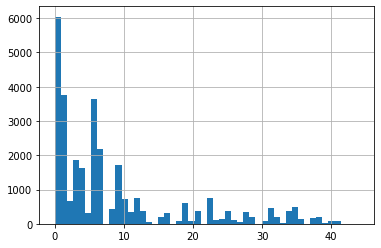

In [ ]:
missing_by_row = df.isna().sum(axis='columns')
missing_by_row.hist(bins=50)

In [ ]:
pct_missing[pct_missing > .3]

max_floor                     0.314135
material                      0.314135
build_year                    0.446490
num_room                      0.314135
kitch_sq                      0.314135
state                         0.444980
hospital_beds_raion           0.473926
cafe_sum_500_min_price_avg    0.435857
cafe_sum_500_max_price_avg    0.435857
cafe_avg_price_500            0.435857
dtype: float64

In [ ]:
df_less_missing_cols = df.loc[:, pct_missing <= .3].copy() # equivalent to df.drop(columns=pct_missing[pct_missing > .3].index)
df_less_missing_cols.shape

(30471, 282)

In [ ]:
df_less_missing_rows = df[missing_by_row < 35].copy()
df_less_missing_rows.shape # equivalent to df.dropna(axis='index', thresh=292-35+1).shape

(29302, 292)

In [ ]:
df_copy = df.copy()
df_copy[numeric_cols] = df_copy[numeric_cols].fillna(-999)
df_copy[non_numeric_cols] = df_copy[non_numeric_cols].fillna('_MISSING_')

In [ ]:
df_copy = df.copy()
med = df_copy[numeric_cols].median()
df_copy[numeric_cols] = df_copy[numeric_cols].fillna(med)

In [ ]:
most_freq = df_copy[non_numeric_cols].describe().loc['top']
most_freq

timestamp                             2014-12-16
product_type                          Investment
sub_area                     Poselenie Sosenskoe
culture_objects_top_25                        no
thermal_power_plant_raion                     no
incineration_raion                            no
oil_chemistry_raion                           no
radiation_raion                               no
railroad_terminal_raion                       no
big_market_raion                              no
nuclear_reactor_raion                         no
detention_facility_raion                      no
water_1line                                   no
big_road1_1line                               no
railroad_1line                                no
ecology                                     poor
Name: top, dtype: object

In [ ]:
df_copy[non_numeric_cols] = df_copy[non_numeric_cols].fillna(most_freq)

Irregular data (outliers)

In [ ]:
df.kurt(numeric_only=True)[:10]

id               -1.199940
full_sq       12128.727462
life_sq       17058.409645
floor             1.731182
max_floor         6.595262
material          1.358512
build_year    16865.716093
num_room         13.292374
kitch_sq       4680.043742
state            88.399730
dtype: float64

In [ ]:
df['life_sq'].describe()

count    24088.000000
mean        34.403271
std         52.285733
min          0.000000
25%         20.000000
50%         30.000000
75%         43.000000
max       7478.000000
Name: life_sq, dtype: float64

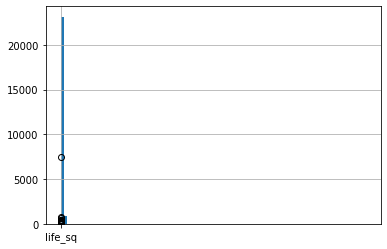

In [ ]:
df['life_sq'].hist(bins=100)

df.boxplot(column=['life_sq'])

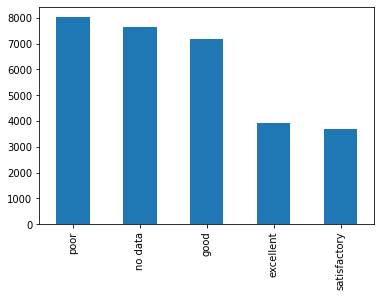

In [ ]:
df['ecology'].value_counts().plot(kind='bar')

Unnecessary data

In [ ]:
num_rows = len(df)

for col in df.columns:
    cnts = df[col].value_counts(dropna=False)
    top_pct = (cnts/num_rows).iloc[0]
    
    if top_pct > 0.999:
        print('{0}: {1:.2f}%'.format(col, top_pct*100))
        print(cnts)
        print()

In [ ]:
df[df.duplicated()]

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,...,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc


In [ ]:
df.drop_duplicates()

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,...,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc
0,1,2011-08-20,43,27.0,4.0,NaN,NaN,NaN,NaN,NaN,...,9,4,0,13,22,1,0,52,4,5850000
1,2,2011-08-23,34,19.0,3.0,NaN,NaN,NaN,NaN,NaN,...,15,3,0,15,29,1,10,66,14,6000000
2,3,2011-08-27,43,29.0,2.0,NaN,NaN,NaN,NaN,NaN,...,10,3,0,11,27,0,4,67,10,5700000
3,4,2011-09-01,89,50.0,9.0,NaN,NaN,NaN,NaN,NaN,...,11,2,1,4,4,0,0,26,3,13100000
4,5,2011-09-05,77,77.0,4.0,NaN,NaN,NaN,NaN,NaN,...,319,108,17,135,236,2,91,195,14,16331452
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30466,30469,2015-06-30,44,27.0,7.0,9.0,1.0,1975.0,2.0,6.0,...,15,5,0,15,26,1,2,84,6,7400000
30467,30470,2015-06-30,86,59.0,3.0,9.0,2.0,1935.0,4.0,10.0,...,313,128,24,98,182,1,82,171,15,25000000
30468,30471,2015-06-30,45,NaN,10.0,20.0,1.0,NaN,1.0,1.0,...,1,1,0,2,12,0,1,11,1,6970959
30469,30472,2015-06-30,64,32.0,5.0,15.0,1.0,2003.0,2.0,11.0,...,22,1,1,6,31,1,4,65,7,13500000


In [ ]:
df[df.drop(columns=['id']).duplicated()]

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,...,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc
3359,3362,2012-08-27,59,NaN,6.0,NaN,NaN,NaN,NaN,NaN,...,4,2,0,3,15,1,0,24,4,4506800
4328,4331,2012-10-22,61,NaN,18.0,NaN,NaN,NaN,NaN,NaN,...,11,2,1,5,4,0,1,32,5,8248500
6991,6994,2013-04-03,42,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,3,2,0,2,16,1,0,20,4,3444000
8059,8062,2013-05-22,68,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,3,2,0,2,16,1,0,20,4,5406690
8653,8656,2013-06-24,40,NaN,12.0,NaN,NaN,NaN,NaN,NaN,...,1,0,0,4,6,0,0,4,1,4112800
14004,14007,2014-01-22,46,28.0,1.0,9.0,1.0,1968.0,2.0,5.0,...,10,1,0,13,15,1,1,61,4,3000000
17404,17407,2014-04-15,134,134.0,1.0,1.0,1.0,0.0,3.0,0.0,...,0,0,0,0,1,0,0,0,0,5798496
26675,26678,2014-12-17,62,NaN,9.0,17.0,1.0,NaN,2.0,1.0,...,371,141,26,150,249,2,105,203,13,6552000
28361,28364,2015-03-14,62,NaN,2.0,17.0,1.0,NaN,2.0,1.0,...,371,141,26,150,249,2,105,203,13,6520500
28712,28715,2015-03-30,41,41.0,11.0,17.0,1.0,2016.0,1.0,41.0,...,2,2,0,2,9,0,0,7,2,4114580


In [ ]:
df_dedupped = df.drop(columns=['id']).drop_duplicates()

print(df.shape)
print(df_dedupped.shape)

(30471, 292)
(30461, 291)


In [ ]:
key = ['timestamp', 'full_sq', 'life_sq', 'floor', 'build_year', 'num_room', 'price_doc']

df_grouped = df.fillna(-999).groupby(key)['id'].count()

df_grouped[df_grouped > 1]

timestamp   full_sq  life_sq  floor  build_year  num_room  price_doc
2012-08-27  59       -999.0   6.0    -999.0      -999.0    4506800      2
2012-09-05  43       -999.0   21.0   -999.0      -999.0    6229540      2
2012-10-22  61       -999.0   18.0   -999.0      -999.0    8248500      2
2013-04-03  42       -999.0   2.0    -999.0      -999.0    3444000      2
2013-05-22  68       -999.0   2.0    -999.0      -999.0    5406690      2
2013-06-24  40       -999.0   12.0   -999.0      -999.0    4112800      2
2013-08-30  40       -999.0   12.0   -999.0       1.0      4462000      2
2013-09-23  85       -999.0   14.0   -999.0       3.0      7725974      2
2013-12-05  40       -999.0   5.0    -999.0       1.0      4414080      2
2013-12-18  39       -999.0   6.0    -999.0       1.0      3700946      2
2014-01-22  46        28.0    1.0     1968.0      2.0      3000000      2
2014-04-15  134       134.0   1.0     0.0         3.0      5798496      2
2014-12-09  40       -999.0   17.0   -999.0

In [ ]:
key = ['timestamp', 'full_sq', 'life_sq', 'floor', 'build_year', 'num_room', 'price_doc']
df_dedupped2 = df.drop_duplicates(subset=key)

print(df.shape)
print(df_dedupped2.shape)

(30471, 292)
(30455, 292)


Inconsistent data

In [ ]:
df['sub_area'].value_counts(dropna=False)

Poselenie Sosenskoe               1776
Nekrasovka                        1611
Poselenie Vnukovskoe              1372
Poselenie Moskovskij               925
Poselenie Voskresenskoe            713
                                  ... 
Molzhaninovskoe                      3
Poselenie Shhapovskoe                2
Poselenie Kievskij                   2
Poselenie Klenovskoe                 1
Poselenie Mihajlovo-Jarcevskoe       1
Name: sub_area, Length: 146, dtype: int64

In [ ]:
df['sub_area_lower'] = df['sub_area'].str.lower()
df['sub_area_lower'].value_counts(dropna=False)

poselenie sosenskoe               1776
nekrasovka                        1611
poselenie vnukovskoe              1372
poselenie moskovskij               925
poselenie voskresenskoe            713
                                  ... 
molzhaninovskoe                      3
poselenie shhapovskoe                2
poselenie kievskij                   2
poselenie klenovskoe                 1
poselenie mihajlovo-jarcevskoe       1
Name: sub_area_lower, Length: 146, dtype: int64

In [ ]:
df['timestamp']

0        2011-08-20
1        2011-08-23
2        2011-08-27
3        2011-09-01
4        2011-09-05
            ...    
30466    2015-06-30
30467    2015-06-30
30468    2015-06-30
30469    2015-06-30
30470    2015-06-30
Name: timestamp, Length: 30471, dtype: object

In [ ]:
df['timestamp_dt'] = pd.to_datetime(df['timestamp'], format='%Y-%m-%d')
df['year'] = df['timestamp_dt'].dt.year
df['month'] = df['timestamp_dt'].dt.month
df['weekday'] = df['timestamp_dt'].dt.weekday

df[['timestamp_dt', 'year', 'month', 'weekday']].head()

,timestamp_dt,year,month,weekday
0,2011-08-20,2011,8,5
1,2011-08-23,2011,8,1
2,2011-08-27,2011,8,5
3,2011-09-01,2011,9,3
4,2011-09-05,2011,9,0


In [ ]:
df_city_ex = pd.DataFrame(data={'city': ['torontoo', 'toronto', 'tronto', 'vancouver', 'vancover', 'vancouvr', 'montreal', 'calgary']})

cities = ['toronto', 'vancouver', 'montreal', 'calgary']
from nltk.metrics import edit_distance
for city in cities:
    df_city_ex[f'city_distance_{city}'] = df_city_ex['city'].map(lambda x: edit_distance(x, city))

df_city_ex

,city,city_distance_toronto,city_distance_vancouver,city_distance_montreal,city_distance_calgary
0,torontoo,1,8,7,8
1,toronto,0,8,7,7
2,tronto,1,8,6,7
3,vancouver,8,0,8,8
4,vancover,7,1,7,7
5,vancouvr,7,1,7,7
6,montreal,7,8,0,8
7,calgary,7,8,8,0


In [ ]:
msk = df_city_ex['city_distance_toronto'] <= 2
df_city_ex.loc[msk, 'city'] = 'toronto'

msk = df_city_ex['city_distance_vancouver'] <= 2
df_city_ex.loc[msk, 'city'] = 'vancouver'

df_city_ex

,city,city_distance_toronto,city_distance_vancouver,city_distance_montreal,city_distance_calgary
0,toronto,1,8,7,8
1,toronto,0,8,7,7
2,toronto,1,8,6,7
3,vancouver,8,0,8,8
4,vancouver,7,1,7,7
5,vancouver,7,1,7,7
6,montreal,7,8,0,8
7,calgary,7,8,8,0


In [ ]:
df_add_ex = pd.DataFrame(['123 MAIN St Apartment 15', '123 Main Street Apt 12   ', '543 FirSt Av', '  876 FIRst Ave.'], columns=['address'])
df_add_ex

,address
0,123 MAIN St Apartment 15
1,123 Main Street Apt 12
2,543 FirSt Av
3,876 FIRst Ave.


In [ ]:
df_add_ex['address_std'] = df_add_ex['address'].str.lower()
df_add_ex['address_std'] = df_add_ex['address_std'].str.strip() # remove leading and trailing whitespaces.
df_add_ex['address_std'] = df_add_ex['address_std'].str.replace('\\.', '', regex=True) # remove period.
df_add_ex['address_std'] = df_add_ex['address_std'].str.replace('\\bstreet\\b', 'st', regex=True) # replace street with st.
df_add_ex['address_std'] = df_add_ex['address_std'].str.replace('\\bapartment\\b', 'apt', regex=True) # replace apartment with apt.
df_add_ex['address_std'] = df_add_ex['address_std'].str.replace('\\bav\\b', 'ave', regex=True) # replace av with ave.

df_add_ex

,address,address_std
0,123 MAIN St Apartment 15,123 main st apt 15
1,123 Main Street Apt 12,123 main st apt 12
2,543 FirSt Av,543 first ave
3,876 FIRst Ave.,876 first ave
